# Лабораторная работа №4.1 (логистическая регрессия)

Создать модель классификации для предсказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холестерин и т.д.)



## Imports

**ЗАДАНИЕ: Выполните команду ниже, чтобы импортировать нужные библиотеки.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

## Данные

В таблице heart.cvs содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца



----

<b>1. Загрузите файл с данными и выведите первые 10 записей</b>

In [2]:
data = pd.read_csv("heart.csv") # Загрузка файла с данными
data.head(10) # Вывод первых 10 записей

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Анализ данных и визуализация данных

 <b>2. Посмотрите, есть ли в наборе данных отсутствующие значения и при необходимости удалите их</b>

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


<b> 3.Определите количество значений в каждом классе и сделайте вывод, являются ли классы сбалансированными</b>

In [4]:
class_counts = data['target'].value_counts()
print("Количество значений в каждом классе:") # Подсчет количества значений в каждом классе target целевой
print(class_counts)
if class_counts[0] == class_counts[1]:  # Проверка сбалансированности классов
    print("Классы сбалансированы.")
else:
    print("Классы не сбалансированы.")

Количество значений в каждом классе:
target
1    165
0    138
Name: count, dtype: int64
Классы не сбалансированы.


**4. Нарисуйте график pairplot, показывающий связи между следующими колонками и сделайте выводы:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*



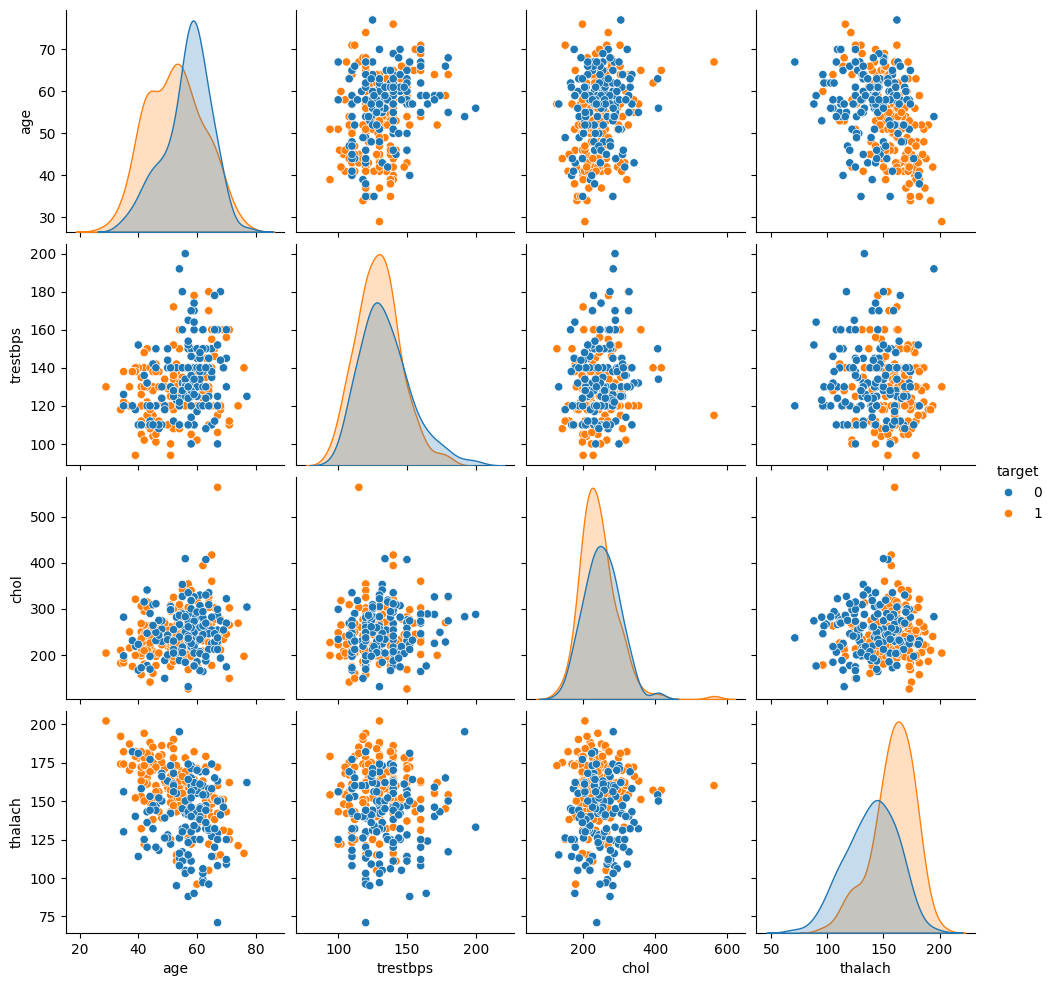

In [5]:
# Выбор колонок для построения графика
columns = ['age', 'trestbps', 'chol', 'thalach', 'target']

sns.pairplot(data[columns], hue='target', diag_kind='kde')   # построение графика
plt.show()

<b> 5.Нарисуйте график heatmap (библиотека Seaborn), показывающий корреляции между всеми колонками.</b>

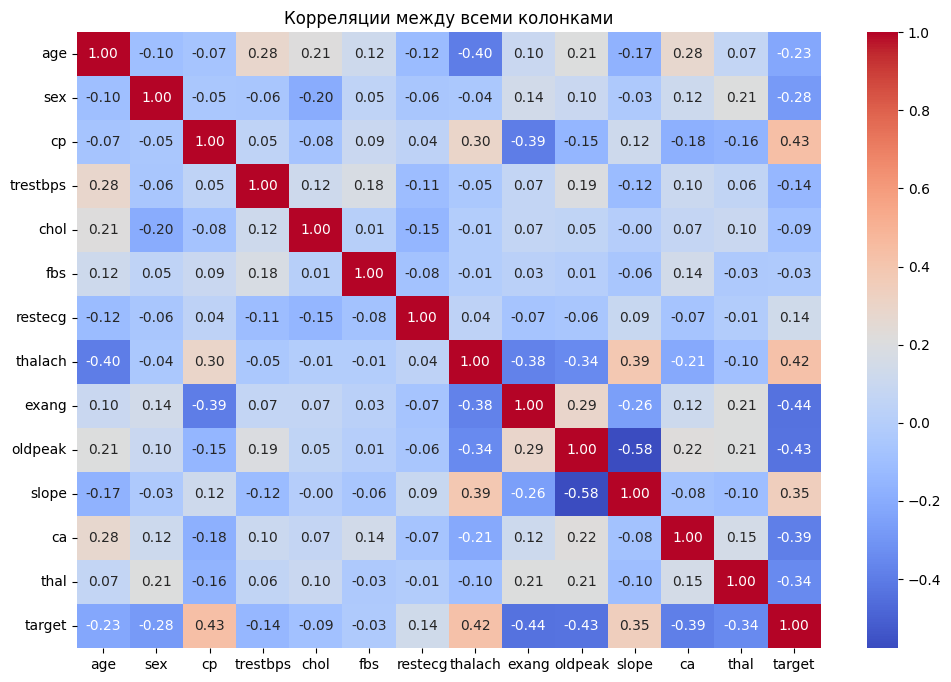

In [6]:
# Вычисление корреляционной матрицы
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")         # построение графика
plt.title('Корреляции между всеми колонками')
plt.show()

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**6. Разделите все признаки на 2 объекта, X и y.**

In [7]:
X = data.drop(columns=['target']) # Выделение признаков X
y = data['target'] # Выделение целевых значений y 

scaler = StandardScaler() # Создание объекта StandardScaler
X_scaled = scaler.fit_transform(X) # Масштабирование признаков


**7. Разбейте данные на обучающий и тестовый наборы данных. Для тестовых данных используйте размер 10% и значение random_state=101.**

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=101) # Разделение данных на обучающий и тестовый наборы
print("Размеры обучающего набора данных (X_train, y_train):", X_train.shape, y_train.shape) # Проверка размеров обучающего и тестового наборов
print("Размеры тестового набора данных (X_test, y_test):", X_test.shape, y_test.shape)

Размеры обучающего набора данных (X_train, y_train): (272, 13) (272,)
Размеры тестового набора данных (X_test, y_test): (31, 13) (31,)


**8. С помощью объекта StandardScaler нормализуйте данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедитесь, что Вы проводите обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [9]:
# Я нормолизовал данные в пункте выше, так что сейчас нет смысла это делать снова


## Модель логистической регрессии

<b>9.Создайте модель логистической регрессии</b>

In [10]:
logistic_regression_model = LogisticRegression() # Создание модели логистической регрессии
logistic_regression_model.fit(X_train, y_train)# Обучение модели на обучающем наборе данных

LogisticRegression()

**10. Отобразите коэффициенты модели**

In [11]:
coefficients = logistic_regression_model.coef_ # Получение коэффициентов модели
print("Коэффициенты модели:")
for i, coef in enumerate(coefficients[0]): # Отображение коэффициентов
    print(f"Признак {X.columns[i]}: {coef}")

Коэффициенты модели:
Признак age: -0.07127991456882185
Признак sex: -0.7292399208861401
Признак cp: 0.8979509885144897
Признак trestbps: -0.2615079574689334
Признак chol: -0.20902710857330725
Признак fbs: 0.045609929854576396
Признак restecg: 0.1194734238944986
Признак thalach: 0.43451527463006195
Признак exang: -0.4319939905106541
Признак oldpeak: -0.5426609988696138
Признак slope: 0.3804179820144403
Признак ca: -0.8483051756141777
Признак thal: -0.5711935674950978


---------

## Оценка модели

**11. Оцените работу модели на оставшихся 10% данных - тестовом наборе данных.**

**Подготовьте следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

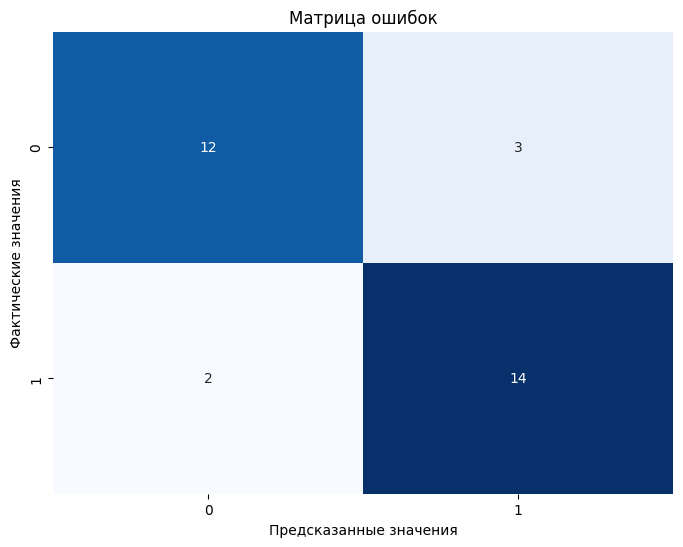

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [12]:
# Получение прогнозов модели на тестовом наборе данных
y_pred = logistic_regression_model.predict(X_test)

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок')
plt.show()

# Вывод отчета о классификации
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

### Кривые производительности

**12. Постройте ROC-кривую и оцените ее площадь**

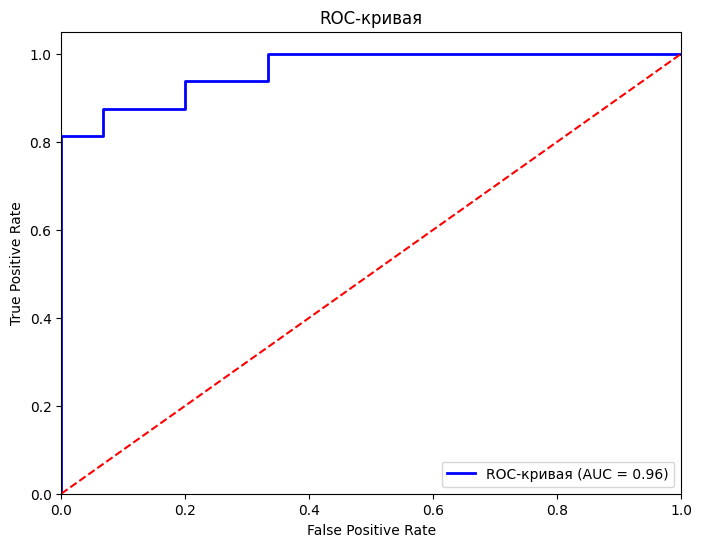

Площадь под ROC-кривой (AUC): 0.9625000000000001


In [13]:
y_probs = logistic_regression_model.predict_proba(X_test)[:, 1] # Вычисление вероятностей принадлежности к положительному классу
fpr, tpr, thresholds = roc_curve(y_test, y_probs) # Вычисление значений ROC-кривой


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC-кривая (AUC = %0.2f)' % roc_auc_score(y_test, y_probs))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')                                                               # Построение ROC-кривой
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


auc = roc_auc_score(y_test, y_probs)
print("Площадь под ROC-кривой (AUC):", auc)         # Вычисление площади под ROC-кривой (AUC)

**13. В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**Добавьте данного пациента в тестовый датасет X_test. Убедитесь, что строка добавлена. Выполните прогнозирование и определите, есть у нового пациента заболевание сердца.**

*Для Вашего удобства уже создан массив с указанными выше значениями:*

In [14]:
patient = [ 64. ,   1. ,   1. , 142. , 286. ,   0. ,   0. , 136. ,   1. ,
          3.2,   1. ,   2. ,   1. ]

In [15]:
new_patient_data = np.array([[48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]])
X_test_with_new_patient = np.vstack([X_test, new_patient_data]) # Добавление нового пациента
print("Размер X_test после добавления нового пациента:", X_test_with_new_patient.shape) # проверка строки
new_patient_prediction = logistic_regression_model.predict(X_test_with_new_patient[-1].reshape(1, -1)) # делаем прогноз

if new_patient_prediction[0] == 0:
    print("У нового пациента нет заболевания сердца.")
else:
    print("У нового пациента есть заболевание сердца.")

Размер X_test после добавления нового пациента: (32, 13)
У нового пациента нет заболевания сердца.
